In [28]:
import pandas as pd
custom_info=pd.read_excel('data/会员信息查询.xlsx')
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

In [40]:
custom_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [4]:
custom_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


In [41]:
custom_info.loc[:,'注册年月']=custom_info['注册时间'].apply(lambda x:x.strftime('%Y-%m'))

In [42]:
custom_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03


In [39]:
month_count=custom_info.groupby('注册年月')[['会员卡号']].count()
month_count.columns=['月增量']
month_count

KeyError: '注册年月'

In [19]:
custom_info.pivot_table(index='注册年月',values='会员卡号',aggfunc='count')

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [23]:
month_count.loc[:,'存量'] =month_count['月增量'].cumsum()

In [24]:
month_count

,月增量,存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889


Text(0.5, 1.0, '会员存量增量分析')

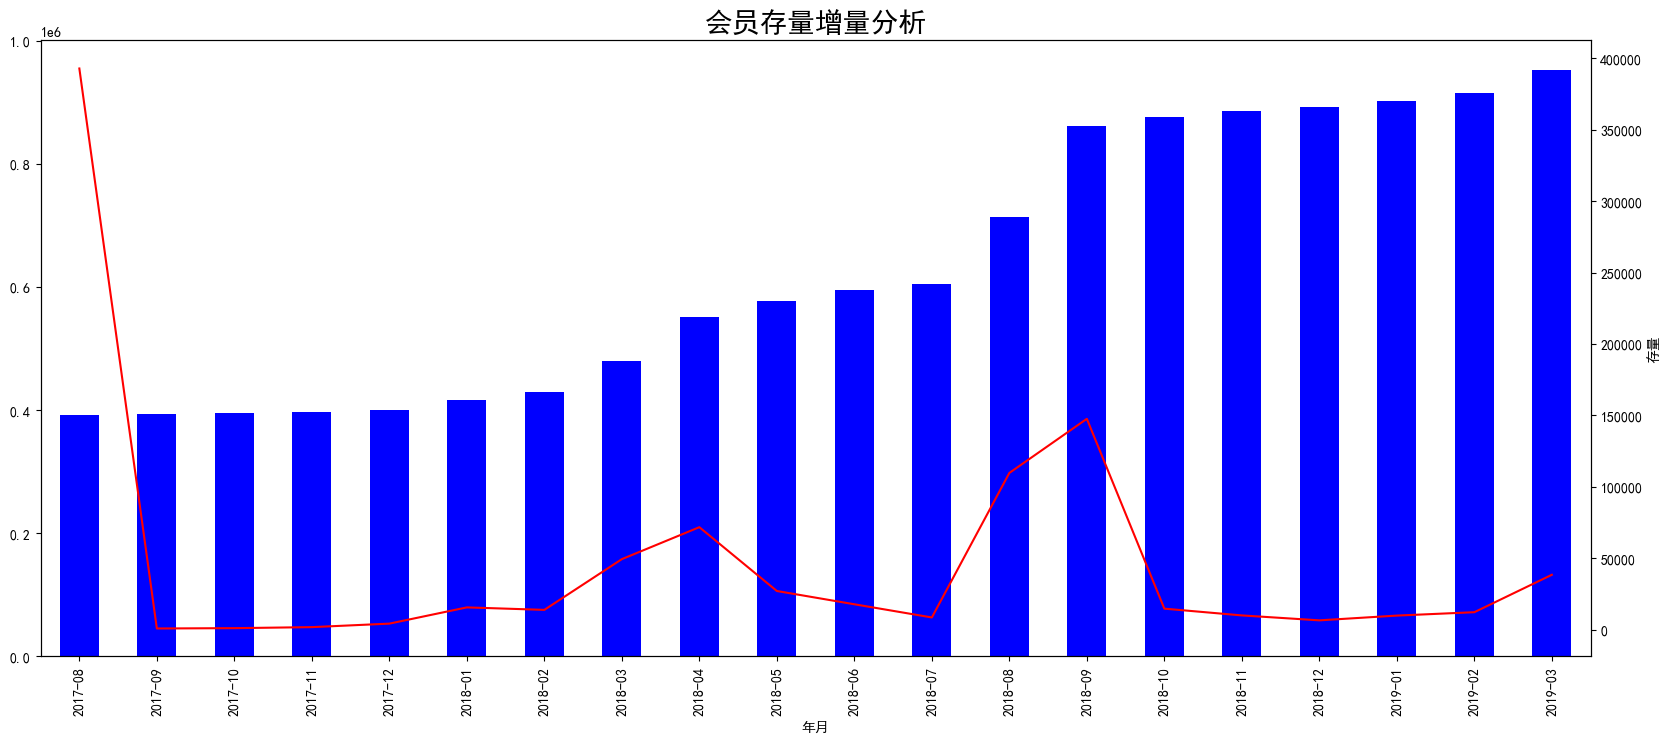

In [37]:
month_count['月增量'].plot(figsize=(20,8),color='red',secondary_y=True)
month_count['存量'].plot.bar(figsize=(20,8),color='blue',xlabel='年月',legend=False,ylabel='存量')
plt.title('会员存量增量分析',fontsize=20)

In [45]:
month_degree_count =custom_info.groupby(['注册年月','会员等级'])[['会员卡号']].count()
month_degree_count.unstack()

会员卡号                 
会员等级       白银会员 钻石会员 铂金会员   黄金会员
注册年月                            
2017-08  376648  185  387  15690
2017-09     530    3   10    217
2017-10     603   13   17    363
2017-11    1311   19   20    360
2017-12    3512   15   24    614
2018-01   11244   24   64   4199
2018-02    9937    9   34   3818
2018-03   41546   57   94   7623
2018-04   62613   48   83   8955
2018-05   19317   19   56   7617
2018-06   11292    7   23   6396
2018-07    3932    8   28   4515
2018-08   95584   27   65  13998
2018-09  133090   20   63  14412
2018-10    9093   15   34   5512
2018-11    6313    4   29   3566
2018-12    2808    3   29   3620
2019-01    3661    5    9   6120
2019-02    4001    5   17   8140
2019-03   10580    3   37  27752

In [48]:
member_rating = custom_info.pivot_table(index = '注册年月',columns='会员等级',values='会员卡号',aggfunc = 'count')
member_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


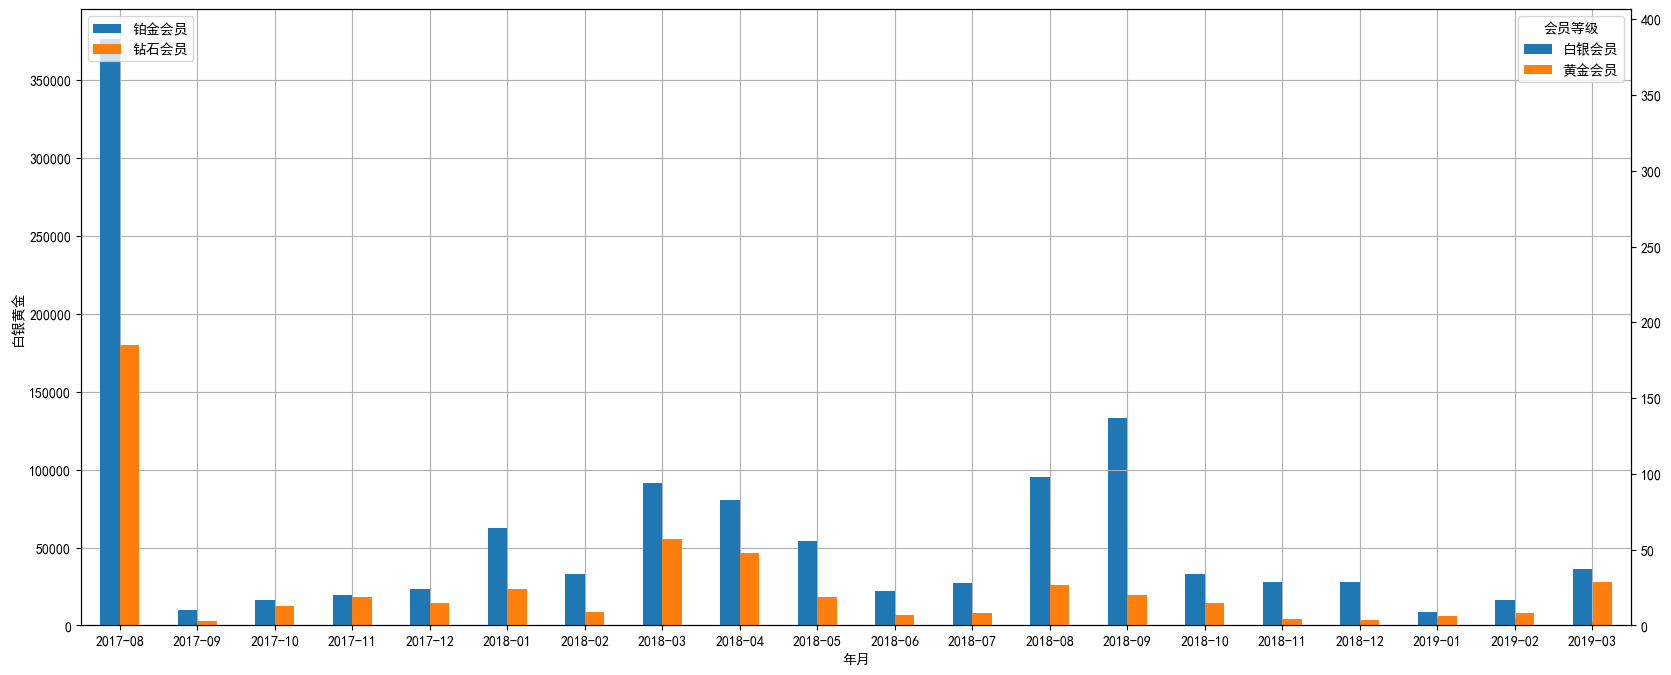

In [65]:
fig,ax1=plt.subplots(figsize=(20,8),dpi=100)
ax2=ax1.twinx()
# ax 画在哪，rot 坐标如2017-08的立体度，grid 网格，legend 角标
member_rating[['白银会员','黄金会员']].plot.bar(ax=ax1,rot=0,grid=True,xlabel='年月',ylabel='白银黄金',legend=True)
member_rating[['铂金会员','钻石会员']].plot.bar(ax=ax2,rot=0)
ax2.legend(loc='upper left')

In [66]:
member_rating.loc[:,'总计'] = member_rating.sum(axis = 'columns')
# axis=columns 按行求和(不是列)

In [71]:
member_rating['白银会员占比']=member_rating['白银会员']/member_rating['总计']
member_rating.loc[:,'黄金会员占比'] = member_rating['黄金会员'].div(member_rating['总计'])
member_rating.loc[:,'铂金会员占比'] = member_rating['铂金会员'].div(member_rating['总计'])
member_rating.loc[:,'钻石会员占比'] = member_rating['钻石会员'].div(member_rating['总计'])


In [72]:
member_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计,白银会员占比,黄金会员占比,铂金会员占比,钻石会员占比
注册年月,,,,,,,,,
2017-08,376648,185,387,15690,392910,0.958611,0.039933,0.000985,0.000471
2017-09,530,3,10,217,760,0.697368,0.285526,0.013158,0.003947
2017-10,603,13,17,363,996,0.605422,0.364458,0.017068,0.013052
2017-11,1311,19,20,360,1710,0.766667,0.210526,0.011696,0.011111
2017-12,3512,15,24,614,4165,0.843217,0.147419,0.005762,0.003601
2018-01,11244,24,64,4199,15531,0.723971,0.270363,0.004121,0.001545
2018-02,9937,9,34,3818,13798,0.720177,0.276707,0.002464,0.000652
2018-03,41546,57,94,7623,49320,0.842376,0.154562,0.001906,0.001156
2018-04,62613,48,83,8955,71699,0.873276,0.124897,0.001158,0.000669


Text(0.5, 1.0, '会员等级占比')

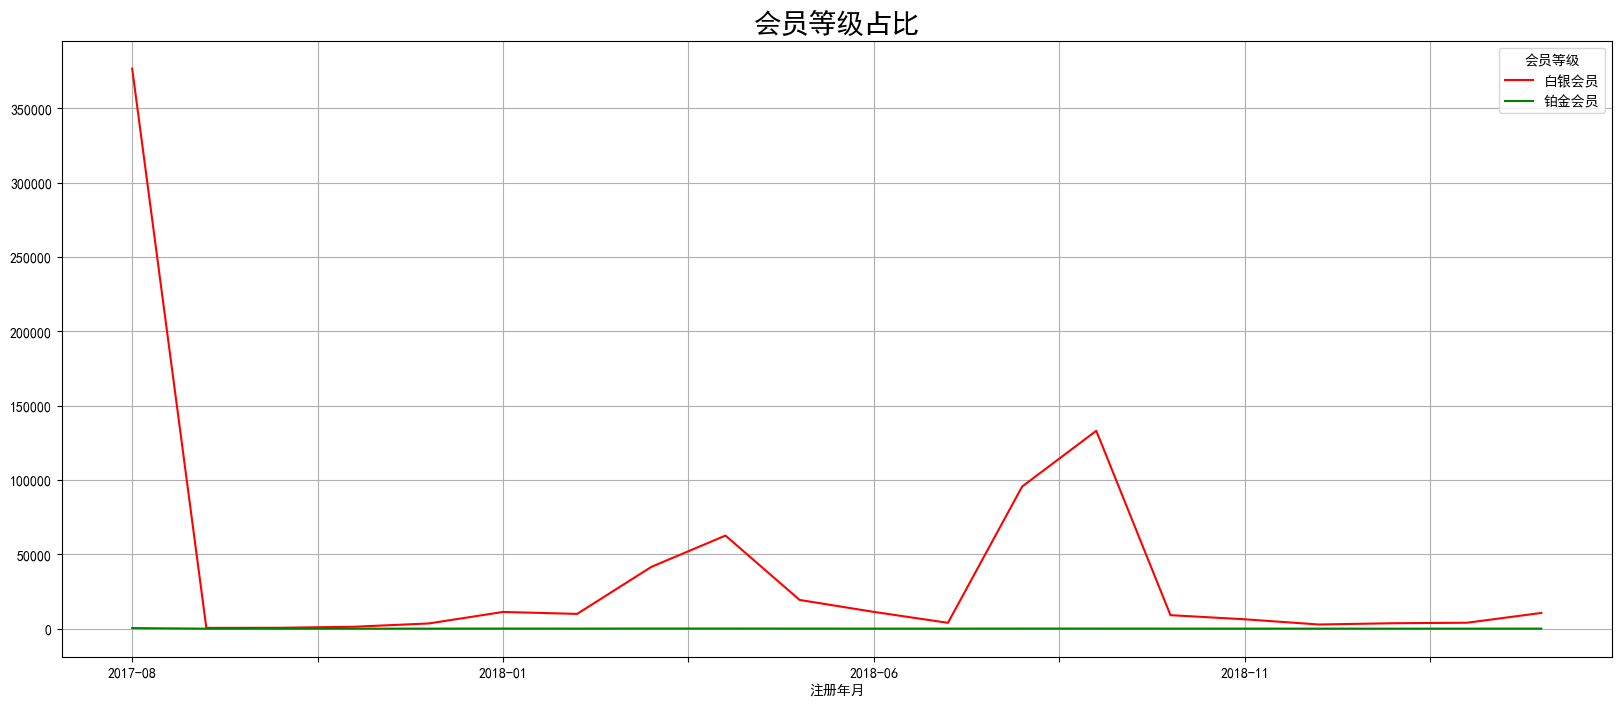

In [74]:
member_rating[['白银会员','铂金会员']].plot(figsize=(20,8),color=['r','g'],grid=True)
plt.title('会员等级占比',fontsize=20)

In [75]:
#会员按等级分组透视表实现
ratio = custom_info.pivot_table(index = '会员等级',values = '会员卡号',aggfunc = 'count')

In [78]:
ratio.columns=['会员数']

In [80]:
ratio['占比']=ratio['会员数']/ratio['会员数'].sum()
ratio

,会员数,占比
会员等级,,
白银会员,807615,0.847699
钻石会员,489,0.000513
铂金会员,1123,0.001179
黄金会员,143487,0.150609


<Axes: ylabel='占比'>

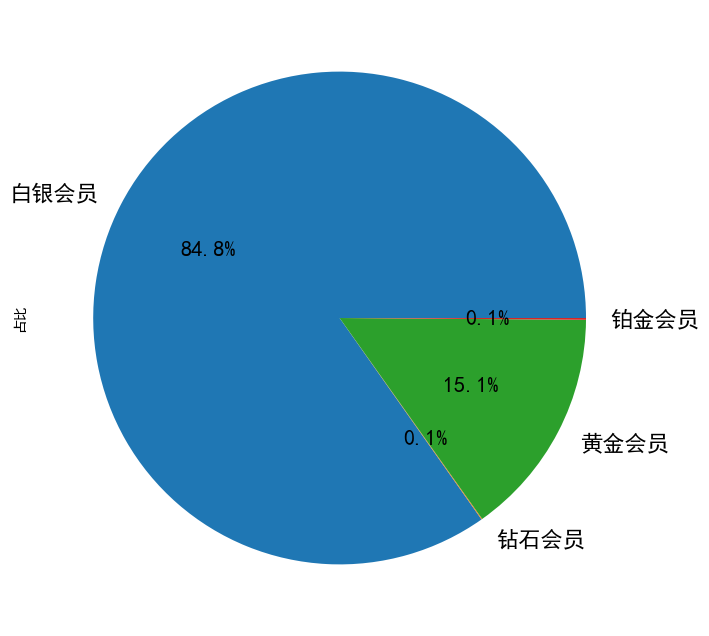

In [82]:
ratio.loc[['白银会员','钻石会员','黄金会员','铂金会员'],'占比'].plot.pie(figsize=(16,8),autopct='%.1f%%',fontsize=16)
# autopct 字符串格式化，%.1f保留1位小数，%%百分号形式